# Section 1: $f(\mathbf{x}) = \mathbf{Ax} - \mathbf{b}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2,1,3],[2,6,8],[6,8,18]]).astype(np.float32) # 3 x 3
b = np.array([[1],[3],[5]]).astype(np.float32) # 3 x 1

x = np.random.uniform(-1.0,1.0,size=(3,1)) # 3 x 1
x_memo = np.copy(x)

# Solution
y = np.dot(np.linalg.inv(A), b)

def F(x):
  return np.dot(A,x) - b


# definition of loss function (MSE of F(x))
def L(x):
  delta = F(x) - y
  return (np.dot(delta.T, delta) / (2 * y.shape[0])).flatten().item()


# definition of gradient
def g(x):
  return np.dot(A.T, F(x))

In [2]:
EPSILON = 1e-4
MAX_ITERATIONS = 50000

def update(x, delta_theta):
  x += delta_theta

In [3]:
def GD(x, alpha, verbose=False):
  """Implementation of gradient descent loop."""
  i = 0
  history = []
  while True:
    update(x, -alpha * g(x))
    loss = L(x)
    history.append(loss)
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break

  return x, history

In [4]:
def Momentum(x, alpha, beta=0.9, verbose=False):
  i = 0
  history = []
  prev_vT = 0
  while True:
    vT = beta * prev_vT + (1 - beta) * g(x)
    update(x, -alpha * vT)
    loss = L(x)
    history.append(loss)
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break
    prev_vT = vT

  return x, history

In [5]:
def Adadelta(x, beta=0.95, verbose=False):
  epsilon = 1e-6
  expected_g_square = 0
  expected_delta_theta_square = 0
  rms_theta = 0
  i = 0
  history = []

  while True:
    gradient = g(x)
    expected_g_square = (beta * expected_g_square) + (1 - beta) *  np.square(gradient)

    delta_theta = -(np.sqrt(expected_delta_theta_square + epsilon) / \
                   np.sqrt(expected_g_square + epsilon)) * gradient
    update(x, delta_theta)

    loss = L(x)
    history.append(loss)
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break
    
    expected_delta_theta_square = (beta * expected_delta_theta_square) + \
        (1 - beta) * np.square(delta_theta)

  return x, history

In [6]:
def Adam(x, alpha, beta1=0.9, beta2=0.999, verbose=False):
  epsilon = 1e-8
  m_t = 0
  v_t = 0
  i = 0
  history = []

  while True:
    t = i + 1
    gradient = g(x)
    m_t = beta1 * m_t + (1 - beta1) * gradient
    v_t = beta2 * v_t + (1 - beta2) * np.square(gradient)

    m_t_hat = m_t / (1 - beta1 ** t)
    v_t_hat = v_t / (1 - beta2 ** t)
    
    update(x, -alpha * m_t_hat / (np.sqrt(v_t_hat) + epsilon))

    loss = L(x)
    history.append(loss)
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break

  return x, history

In [7]:
def AdamWithWarmup(x, alpha, beta1=0.9, beta2=0.999, warmup_steps=1000, verbose=False):
  epsilon = 1e-8
  m_t = 0
  v_t = 0
  i = 0
  history = []

  while True:
    t = i + 1
    warmup_rate = t / warmup_steps
    learning_rate = alpha * min(1, warmup_rate)
    
    gradient = g(x)
    m_t = beta1 * m_t + (1 - beta1) * gradient
    v_t = beta2 * v_t + (1 - beta2) * np.square(gradient)

    m_t_hat = m_t / (1 - beta1 ** t)
    v_t_hat = v_t / (1 - beta2 ** t)
    
    update(x, -learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon))

    loss = L(x)
    history.append(loss)
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break

  return x, history

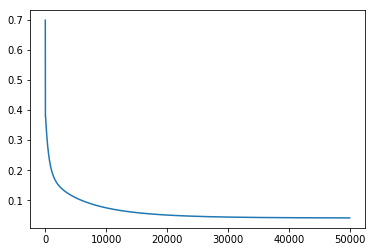

In [54]:
x = np.copy(x_memo)
x, history = GD(x, alpha=0.0002, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

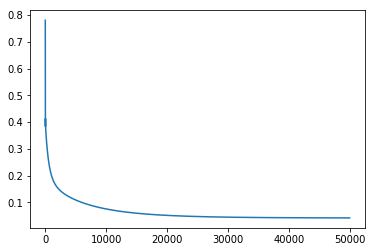

In [55]:
x = np.copy(x_memo)
x, history = Momentum(x, alpha=0.0002, beta=0.9, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

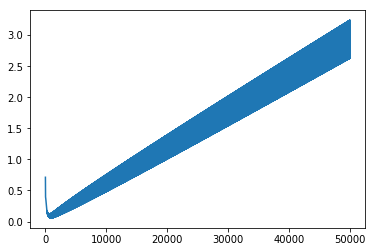

In [56]:
x = np.copy(x_memo)
x, history = Adadelta(x, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

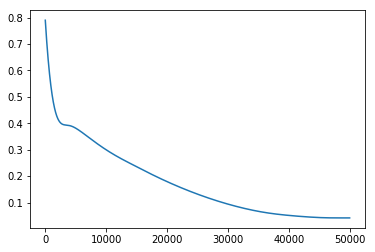

In [57]:
x = np.copy(x_memo)
x, history = Adam(x, alpha=2e-5, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

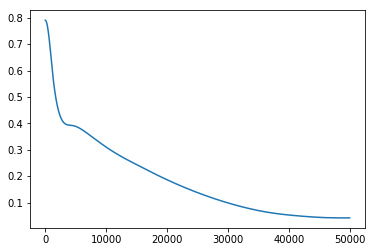

In [58]:
x = np.copy(x_memo)
x, history = AdamWithWarmup(x, alpha=2e-5, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

# Section 2: $f(\mathbf{x}) = (1-x_{0})^2 + 100 \times (x_{1} - (x_{0})^2)^2 $

In [59]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-1.0,1.0,size=(2,1))
x_memo = np.copy(x)
y = 0

def F(x):
  return np.power(1-x[0],2) + 100.0*np.power(x[1] - np.power(x[0],2),2)


# definition of loss function (MSE of F(x))
def L(x):
  delta = F(x) - y
  return (np.square(delta) / (2 * x.shape[0])).flatten().item()


# definition of gradient
def g(x):
  return np.array([
    -2*(1-x[0]) - 100.0*4*x[0]*(x[1] - np.power(x[0],2)),
    100.0*2*(x[1] - np.power(x[0],2))
  ])

In [60]:
EPSILON = 1e-7

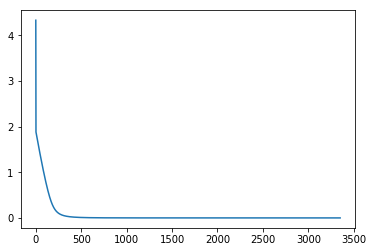

In [61]:
x = np.copy(x_memo)
x, history = GD(x, 0.002, False)
plt.cla()
plt.plot(history)
plt.show()

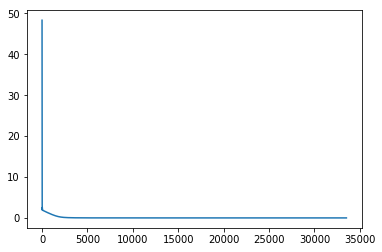

In [62]:
x = np.copy(x_memo)
x, history = Momentum(x, alpha=0.0002, beta=0.9, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

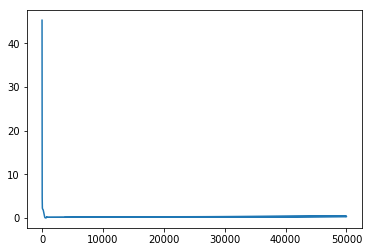

In [63]:
x = np.copy(x_memo)
x, history = Adadelta(x, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

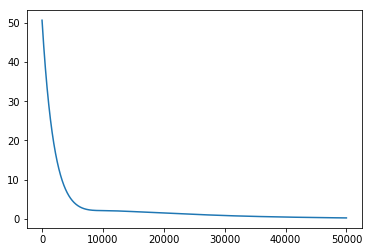

In [64]:
x = np.copy(x_memo)
x, history = Adam(x, alpha=2e-5, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

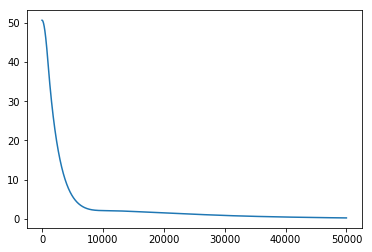

In [65]:
x = np.copy(x_memo)
x, history = AdamWithWarmup(x, alpha=2e-5, verbose=False)
plt.cla()
plt.plot(history)
plt.show()

# Section 3: optimizers in neural network 

- Previous neural network

In [8]:
class NN:
  def initialize_weights(shapes, outputs):
    """Initializes weights of model according to shape.

        Args:
          shapes = [784, 300, 10]
          outputs = ["relu", "sigmoid"]
        returns:
          model with uniform random weights [-1,+1], zero bias and output function
          [
          [random(784, 300), zeros(300), "relu"]
          [random(300, 10), zeros(10), "sigmoid"] 
        ]
    """
    models = []
    for i in range(len(shapes)):
      if i is 0:
        continue

      models.append([
        np.random.uniform(-1, 1, (shapes[i - 1], shapes[i])),
        np.zeros(shapes[i]).reshape(1, shapes[i]),
        outputs[i - 1]
      ])

    return models
    
  def relu(x):
    """Computes relu of function."""
    return np.maximum(0, x)

  def sigmoid(x):
    """Computes sigmoid of function."""
    return 1 / (1 + np.exp(-x))

  def relu_derivative(z):
    """Computes derivative of relu of function."""
    z_copy = np.array(z, copy=True)
    z_copy[z_copy <= 0] = 0
    z_copy[z_copy > 0] = 1
    return z_copy

  def sigmoid_derivative(z):
    """Computes derivative of sigmoid of function."""
    sig = sigmoid(z)
    return sig * (1 - sig)
      
  def activate(z, funcName):
    """Activate the given input based on activation function name
    
      Args:
        z: input tensor of shape (B, Ni)
        funcName: string of supported activation function name
      Returns:
        tensor of shape (B, Ni) after applied activation function
    """
    supported_funcs = {
      "relu": NN.relu,
      "sigmoid": NN.sigmoid,
      "linear": lambda x: x
    }

    if funcName not in supported_funcs:
      raise Exception("Unsupported function")

    return supported_funcs[funcName](z)
    
  def forward(x, model):
    """Performs forward pass of training step.

      Args:
        x: input tensor of shape (B, Ni)
        model: list of model weights (see initialize weights)
      Returns:
        List containing dictionary { "y": y, "z": z } for each layer of network.
    """     

    # Add input as first layer, which will be consumed in backward
    layer_output = [{"z": x, "y": x}]

    for w, b, activation_func in model:
      y_prev = layer_output[-1]["y"]
      
      z = np.dot(y_prev, w) + b
      y = NN.activate(z, activation_func)
      
      layer_output.append({"z": z, "y": y})

    return layer_output
    
  def predict(x, model):
    """Predicts the output of a model.

      Args:
        x: input tensor of shape (B, Ni)
        model: list of model weights (see initialize weights)
      Returns:
        Prediction of model, with the same shape as the labeled data (B, No).
    """
    fwd = forward(x, model)
    return fwd[-1]["y"]
    
  def mse(y, p):
    """Computes Mean-Square Error between y and p.
      Args:
        y: labeled data of size (B, No) 
        p: predicted label of size (B, No)
      Returns:
        MSE of y-p
    """
    return np.mean(np.square(y-p))

  def mse_derivative(y, p):
    """Computes derivative of Mean-Square Error between y and p.
      Args:
        y: labeled data of size (B, No) 
        p: predicted label of size (B, No)
      Returns:
        derivative of MSE = y-p
    """
    return p-y
    
  def binary_crossentropy(y, p):
    """Computes binary crossentropy between y and p.
      Args:
        y: labeled data of size (B, No) 
        p: predicted label of size (B, No)
      Returns:
        BCE of (y, p) = mean(sum(y log(p) + (1-y) log(1-p))) 
    """
    return -np.mean(y * np.log(p) + (1-y) * np.log(1-p))

  def binary_crossentropy_derivative(y, p):
    """Computes derivative of binary crossentropy between y and p.
      Args:
        y: labeled data of size (B, No) 
        p: predicted label of size (B, No)
      Returns:
        derivative of BCE of (y, p) = -[y / p - (1-y) / (1-p)]
    """
    return -((y / p) - np.divide(1-y, 1-p))
    
  def get_cost(y, p, funcName, is_last_layer_error=False):
    """Calculate lost based on cost function name.
    
      Args:
        y: input tensor of shape (B, Ni)
        p: label vector of shape (B, 1)
        funcName: string of supported lost function name
      Returns:
        tensor of shape (B, Ni) after applied cost function
    """
    supported_cost_funcs = {
      "mse": NN.mse,
      "binary_crossentropy": NN.binary_crossentropy,
    }
      
    supported_cost_funcs_derivative = {
      "mse": NN.mse_derivative,
      "binary_crossentropy": NN.binary_crossentropy_derivative,
    }

    # Should also appear in supported_cost_funcs_derivative 
    if funcName not in supported_cost_funcs:
      raise Exception("Unsupported function")

    func = supported_cost_funcs_derivative if is_last_layer_error else supported_cost_funcs

    return func[funcName](y, p)

  def get_activation_derivative(z, funcName):
    """Computes derivative of activation function for computing dZ.
      Args:
        z: input tensor of shape (B, Ni)
        funcName: string of supported activation function name
      Returns:
        derivative of activation function
    """
    supported_funcs = {
      "relu": NN.relu_derivative,
      "sigmoid": NN.sigmoid_derivative,
      "linear": lambda _: 1
    }

    if funcName not in supported_funcs:
      raise Exception("Unsupported function")

    return supported_funcs[funcName](z)

  def backward(y, x, models, loss):
    """Computes backward step of training.
      Args:
        y: labeled data of size (B, No) 
        x: input tensor of shape (B, Ni)
        model: list of model weights (see initialize weights)
        loss: one of ("mse", "binary_crossentropy")
      Returns:
        tuple with loss evaluation of (y, predict(x)) and list of dictionary
        containing { "dw": dw, "db": db } for each layer of network. Remember
        that shape of dw for each layer should be equal to shape of weight for
        the same layer.
    """
    y_predicted = x[-1]["y"]
    y = y.reshape(y_predicted.shape)
    b = y.shape[0] # number of training data

    cost = NN.get_cost(y, y_predicted, loss)
    weights = []

    dY_prev = NN.get_cost(y, y_predicted, loss, is_last_layer_error=True)

    for i, model in reversed(list(enumerate(models))):
      dY_curr = dY_prev

      Y_prev = x[i]["y"]
      Z_curr = x[i + 1]["z"]
      W_curr, _, activation_func = model
      
      dZ_curr = get_activation_derivative(Z_curr, activation_func) * dY_curr
      dW_curr = np.dot(Y_prev.T, dZ_curr) / b
      db_curr = np.sum(dZ_curr, axis=0, keepdims=True) / b
      dY_prev = np.dot(dZ_curr, W_curr.T)

      weights.insert(0, {"dw": dW_curr, "db": db_curr})

    return (cost, weights)
    
  def update(weights, dweights, alpha):
    """Gradient descent for weights and biases."""
    for i in range(len(weights)):
      weights[i][0] += - alpha * dweights[i]["dw"]
      weights[i][1] += - alpha * dweights[i]["db"]

- New Trainings using mnist and previous neural network

In [9]:
import numpy as np

from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.preprocessing import normalize

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784).astype(np.float32)
x_test = x_test.reshape(x_test.shape[0], 784).astype(np.float32)

y_train = to_categorical(y_train, 10).astype(np.float32)
y_test = to_categorical(y_test, 10).astype(np.float32)

x_train = normalize(x_train, norm='max', axis=0)
x_test = normalize(x_test, norm='max', axis=0)

Using TensorFlow backend.
/Users/daniel/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/daniel/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/daniel/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline 

def plot_loss(losses, test_loss, epochs):
  fig, ax = plt.subplots()
  time = np.arange(0, epochs, 1)
  ax.plot(time, losses)

  # test loss
  y = test_loss
  plt.axhline(y=y, color="orange")
  text = 'test loss: ' + str(np.around(y, decimals=3))
  plt.annotate(text, xy=(2, y), xytext=(3, y * 1.05),
    arrowprops=dict(facecolor='black', shrink=0.05),
  )

  ax.set(xlabel='iteration', ylabel='loss',
       title='Loss over time')
  plt.show()
    
def plot_accuracy(accuracies, test_accuracy, epochs):
  fig, ax = plt.subplots()
  time = np.arange(0, epochs, 1)
  ax.plot(time, accuracies)

  # test accuracy
  y = test_accuracy
  plt.axhline(y=y, color="orange")
  text = 'test accuracy: ' + str(np.around(y, decimals=3))
  plt.annotate(text, xy=(2, y), xytext=(3, y * 0.95),
    arrowprops=dict(facecolor='black', shrink=0.05),
  )

  ax.set(xlabel='iteration', ylabel='accuracy',
       title='Accuracy over time')
  plt.show()


In [11]:
# create a network using the network you created before (with sigmoid as output layer)
# and train your network here using SGD, Momentum, Adadelta, Adam and
# AdamWithWarmup
# 
# Plot accuracy and loss as a function of the number of iterations for each
# optimization function above.

outputs = ["sigmoid"]
shapes = [x_train.shape[1], y_train.shape[1]]

model = NN.initialize_weights(shapes, outputs)
model_memo = np.copy(model)

labels = np.argmax(y_train, axis=1)

fwd_results = NN.forward(x_train, model)
y_predicted = fwd_results[-1]["y"]
y = y_train.reshape(y_predicted.shape)

def F(model):
  return NN.forward(x_train, model)[-1]["y"]

# definition of loss function
def L(model):
  return NN.get_cost(y, F(model), "binary_crossentropy")

# definition of gradient
def g(model):
  return F(model) - y

def update(model, delta_theta):
  for i in range(len(model)):
    model[i][0] += delta_theta[i]
#     model[i][1] += delta_theta[i]["db"]

In [12]:
model = np.copy(model_memo)
# print(model)
_, history = Adadelta(model, verbose=True)
plt.cla()
plt.plot(history)
plt.show()
# Training
# for i in range(epochs):
#   fwd_results = forward(x_train, model)
#   loss, dweights = backward(y_train, fwd_results, model, "binary_crossentropy")
#   update(model, dweights, alpha)

#   prediction = predict(x_train, model)
#   prediction = np.argmax(prediction, axis=1)

#   accuracy = np.divide(np.sum(prediction==labels), labels.shape[0])
#   accuracy = np.around(accuracy, decimals=3)

#   train_accuracies.append(accuracy)
#   train_losses.append(loss)

# Test Set
# test_results = forward(x_test, model)
# test_loss, _ = backward(y_test, test_results, model, "binary_crossentropy")
# prediction = test_results[-1]["y"]
# prediction = np.argmax(prediction, axis=1)

# test_labels = np.argmax(y_test, axis=1)
# test_accuracy = np.divide(np.sum(prediction==test_labels), test_labels.shape[0])
# test_accuracy = np.around(test_accuracy, decimals=3)

# Plot
# plot_loss(train_losses, test_loss, epochs)
# plot_accuracy(train_accuracies, test_accuracy, epochs)

0 2.6061376673370726 [array([[ 0.80996574, -0.40869818,  0.2913421 , ...,  0.35755099,
         0.49611163,  0.65187124],
       [ 0.30251443,  0.45615431, -0.95948848, ..., -0.80952681,
         0.95883855, -0.52624226],
       [-0.39439572,  0.48353541, -0.18925595, ..., -0.22396943,
         0.9686213 , -0.98679881],
       ...,
       [ 0.0964266 , -0.33328818, -0.51113794, ..., -0.91536537,
        -0.24670738, -0.76783717],
       [-0.16463962,  0.92998561, -0.44070672, ...,  0.08768295,
        -0.66191962, -0.1832661 ],
       [ 0.07881761, -0.26516979,  0.72362449, ...,  0.52655757,
         0.41344983, -0.66813148]])
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) 'sigmoid']
1 2.475109129374178 [array([[ 0.80543739, -0.41321883,  0.29091006, ...,  0.35734508,
         0.4922629 ,  0.64775078],
       [ 0.29798608,  0.45163366, -0.95992053, ..., -0.80973272,
         0.95498983, -0.53036272],
       [-0.39892407,  0.47901476, -0.18968799, ..., -0.22417535,
         0.964772

12 1.6729452832885254 [array([[ 0.75588454, -0.45508951,  0.2871534 , ...,  0.35534031,
         0.47530661,  0.62785764],
       [ 0.24843323,  0.40976298, -0.96367719, ..., -0.8117375 ,
         0.93803354, -0.55025586],
       [-0.44847692,  0.43714408, -0.19344465, ..., -0.22618012,
         0.94781628, -1.01081241],
       ...,
       [ 0.0423454 , -0.37967951, -0.51532665, ..., -0.91757606,
        -0.26751239, -0.79185077],
       [-0.21872082,  0.88359428, -0.44489542, ...,  0.08547227,
        -0.68272464, -0.2072797 ],
       [ 0.02473641, -0.31156112,  0.71943579, ...,  0.52434688,
         0.39264482, -0.69214507]])
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) 'sigmoid']
13 1.639970366292528 [array([[ 0.75210681, -0.45714931,  0.28687738, ...,  0.35517798,
         0.47456102,  0.6270236 ],
       [ 0.2446555 ,  0.40770318, -0.96395321, ..., -0.81189983,
         0.93728795, -0.5510899 ],
       [-0.45225465,  0.43508427, -0.19372067, ..., -0.22634245,
         0.9470

24 1.475911476154641 [array([[ 7.30477884e-01, -4.69550508e-01,  2.84288673e-01, ...,
         3.53559116e-01,  4.68578787e-01,  6.20524712e-01],
       [ 2.23026574e-01,  3.95301982e-01, -9.66541914e-01, ...,
        -8.13518689e-01,  9.31305709e-01, -5.57588789e-01],
       [-4.73883576e-01,  4.22683079e-01, -1.96309380e-01, ...,
        -2.27961311e-01,  9.41088457e-01, -1.01814534e+00],
       ...,
       [ 1.69387355e-02, -3.94140509e-01, -5.18191373e-01, ...,
        -9.19357246e-01, -2.74240219e-01, -7.99183702e-01],
       [-2.44127476e-01,  8.69133281e-01, -4.47760150e-01, ...,
         8.36910771e-02, -6.89452466e-01, -2.14612629e-01],
       [-6.70250809e-04, -3.26022115e-01,  7.16571059e-01, ...,
         5.22565693e-01,  3.85916991e-01, -6.99478005e-01]])
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) 'sigmoid']
25 1.469268156946149 [array([[ 0.72953141, -0.47022058,  0.28408588, ...,  0.35342514,
         0.46816003,  0.62008134],
       [ 0.2220801 ,  0.39463191, -0.

36 1.421332574215864 [array([[ 0.72241808, -0.47574965,  0.28210874, ...,  0.35206731,
         0.46424455,  0.61599745],
       [ 0.21496677,  0.38910284, -0.96872184, ..., -0.81501049,
         0.92697147, -0.56211605],
       [-0.48194338,  0.41648394, -0.19848931, ..., -0.22945311,
         0.93675422, -1.0226726 ],
       ...,
       [ 0.00887893, -0.40033965, -0.5203713 , ..., -0.92084905,
        -0.27857446, -0.80371096],
       [-0.25218728,  0.86293414, -0.44994008, ...,  0.08219927,
        -0.6937867 , -0.21913989],
       [-0.00873005, -0.33222125,  0.71439113, ...,  0.52107389,
         0.38158275, -0.70400526]])
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) 'sigmoid']
37 1.4183721557701758 [array([[ 0.721952  , -0.47614163,  0.28194844, ...,  0.35195325,
         0.46393416,  0.61567808],
       [ 0.21450069,  0.38871086, -0.96888214, ..., -0.81512455,
         0.92666108, -0.56243543],
       [-0.48240946,  0.41609196, -0.19864961, ..., -0.22956717,
         0.9364

48 1.393541608832281 [array([[ 0.71778788, -0.47979828,  0.28034825, ...,  0.3507838 ,
         0.46081822,  0.61250164],
       [ 0.21033657,  0.38505421, -0.97048234, ..., -0.81629401,
         0.92354514, -0.56561187],
       [-0.48657358,  0.41243531, -0.2002498 , ..., -0.23073663,
         0.93332789, -1.02616842],
       ...,
       [ 0.00424873, -0.40438828, -0.5221318 , ..., -0.92213257,
        -0.28200079, -0.80720678],
       [-0.25681748,  0.85888551, -0.45170057, ...,  0.08091576,
        -0.69721303, -0.22263571],
       [-0.01336026, -0.33626989,  0.71263064, ...,  0.51979037,
         0.37815642, -0.70750108]])
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) 'sigmoid']
49 1.3918051090564798 [array([[ 0.71747232, -0.48008652,  0.2802157 , ...,  0.35068449,
         0.46055563,  0.61223613],
       [ 0.21002101,  0.38476597, -0.97061489, ..., -0.81639332,
         0.92328255, -0.56587737],
       [-0.48688914,  0.41214706, -0.20038235, ..., -0.23083594,
         0.9330

60 1.3763891145520053 [array([[ 7.14413008e-01, -4.82960529e-01,  2.78871301e-01, ...,
         3.49657395e-01,  4.57809347e-01,  6.09474832e-01],
       [ 2.06961698e-01,  3.81891961e-01, -9.71959286e-01, ...,
        -8.17420410e-01,  9.20536269e-01, -5.68638669e-01],
       [-4.89948452e-01,  4.09273058e-01, -2.01726751e-01, ...,
        -2.31863032e-01,  9.30319017e-01, -1.02919522e+00],
       ...,
       [ 8.73859412e-04, -4.07550529e-01, -5.23608745e-01, ...,
        -9.23258966e-01, -2.85009659e-01, -8.10233583e-01],
       [-2.60192352e-01,  8.55723261e-01, -4.53177522e-01, ...,
         7.97893566e-02, -7.00221906e-01, -2.25662509e-01],
       [-1.67351269e-02, -3.39432136e-01,  7.11153688e-01, ...,
         5.18663972e-01,  3.75147551e-01, -7.10527885e-01]])
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) 'sigmoid']
61 1.3752616035918608 [array([[ 7.14163506e-01, -4.83201141e-01,  2.78758291e-01, ...,
         3.49569457e-01,  4.57569629e-01,  6.09234910e-01],
       [ 2.

71 1.36588081511154 [array([[ 0.71183585, -0.48548784,  0.27769851, ...,  0.34873334,
         0.45523018,  0.60689971],
       [ 0.20438454,  0.37936465, -0.97313208, ..., -0.81834446,
         0.9179571 , -0.57121379],
       [-0.49252561,  0.40674574, -0.20289955, ..., -0.23278709,
         0.92773985, -1.03177035],
       ...,
       [-0.0017033 , -0.41007784, -0.52478154, ..., -0.92418302,
        -0.28758883, -0.81280871],
       [-0.26276951,  0.85319595, -0.45435032, ...,  0.0788653 ,
        -0.70280108, -0.22823763],
       [-0.01931229, -0.34195945,  0.70998089, ...,  0.51773992,
         0.37256838, -0.71310301]])
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) 'sigmoid']
72 1.3651104646855596 [array([[ 0.71161615, -0.48570732,  0.27759894, ...,  0.34865375,
         0.4550007 ,  0.60667112],
       [ 0.20416484,  0.37914517, -0.97323165, ..., -0.81842405,
         0.91772762, -0.57144238],
       [-0.49274531,  0.40652627, -0.20299911, ..., -0.23286667,
         0.92751

KeyboardInterrupt: 